In [1]:
#importing required python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#reading cars data into pandas data frame
df = pd.read_csv('cars.csv')



#decribing the data using describe() method
df.describe()



,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Number of Forward Gears,Fuel Information.City mpg,Fuel Information.Highway mpg,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
count,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000
mean,145.632191,127.825847,144.012411,5.519110,17.275808,24.125493,2010.867612,270.499409,272.707250
std,62.125026,77.358295,79.925899,0.845637,4.479485,6.488293,0.782951,95.293537,100.123328
min,1.000000,2.000000,1.000000,4.000000,8.000000,11.000000,2009.000000,100.000000,98.000000
25%,104.000000,60.000000,62.000000,5.000000,14.000000,20.000000,2010.000000,190.000000,187.000000
50%,152.000000,128.000000,158.000000,6.000000,17.000000,24.000000,2011.000000,266.000000,260.000000
75%,193.000000,198.000000,219.000000,6.000000,20.000000,28.000000,2011.000000,317.000000,335.000000
max,255.000000,255.000000,254.000000,8.000000,38.000000,223.000000,2012.000000,638.000000,774.000000


In [2]:
#creating col1 with Horsepower  column of the data set
col1=df['Engine Information.Engine Statistics.Horsepower']

#counting no of records in Horsepower coloumn
print("Count of records",col1.count())

#calculating the mean of col1
print("Mean of the Horsepower:",col1.mean())

#calculating the median of col1
print("Median of the Horsepower:",col1.median())

#calculating the mode of col1
print("Mode of the Horsepower:",col1.mode())


#Calculating trimmed mean of Horse power column by ignoring 5% of data at the begining and end

#sorting values of column Horsepower
df2 = df.sort_values(by='Engine Information.Engine Statistics.Horsepower').copy()

#sorting values of column Horsepower by ignoring index 
df2 = df.sort_values(by='Engine Information.Engine Statistics.Horsepower',ignore_index=True).copy()
#df2['Engine Information.Engine Statistics.Horsepower'].head()
#calculating trimmed mean
print("The 5% trimmed mean of Horsepower:",df2.loc[int(0.05*5075):int(0.95*5075),'Engine Information.Engine Statistics.Horsepower'].mean())
print("The 10% trimmed mean of Horsepower:",df2.loc[int(0.1*5075):int(0.9*5075),'Engine Information.Engine Statistics.Horsepower'].mean())

Count of records 5076
Mean of the Horsepower: 270.49940898345153
Median of the Horsepower: 266.0
Mode of the Horsepower: 0    310
dtype: int64
The 5% trimmed mean of Horsepower: 265.59312759903696
The 10% trimmed mean of Horsepower: 263.68825412459984


The 50% quantile= 266.0
The 25% quantile= 190.0
The 75% quantile= 317.0


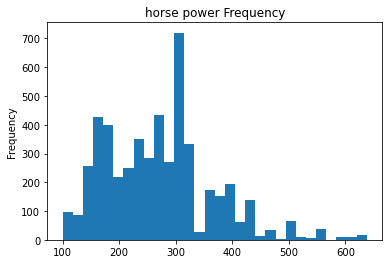

In [7]:
#Histogram plot of col1
col1.plot(kind='hist',bins=30, title='horse power Frequency')
print("The 50% quantile=",col1.quantile())
print("The 25% quantile=",col1.quantile(0.25))
print("The 75% quantile=",col1.quantile(0.75))
#Median of Horse power column is equal to the 50% quantile
#Mean and Mode falls on the right side of Median in the histogram channel
#5% and 10% trimmed mean falls on the left side of median



In [8]:
#Caluclating Mean Absolute Deviation and Standrad deviation
print("The Mean aboslute deviation of column Horse Power=",col1.mad())
print("The standard deviation of column Horse Power=",col1.std())

#Calculating the interquartile range (the difference of the 75% and 25% quantile)

print("the difference of the 75% and 25% quantile=",col1.quantile(0.75)-col1.quantile(0.25))

#Mean absolute deviation is less than, standard deviation and interquartile range

The Mean aboslute deviation of column Horse Power= 74.82896125465031
The standard deviation of column Horse Power= 95.29353665243752
the difference of the 75% and 25% quantile= 127.0


<AxesSubplot:>

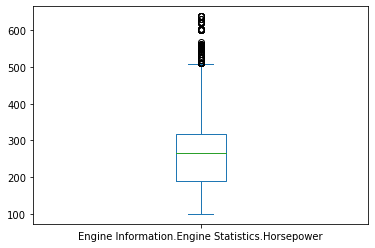

In [9]:
#Box plot of Horse power column (col1)
df['Engine Information.Engine Statistics.Horsepower'].plot(kind='box')

Here the box goes from Q1 to Q3 (190 to 317), The caluclated median matches with the green line inside the box.

In [10]:
splitvalue = []

In [11]:
#Making a new column 'COL1_mean_split'
#If the COL1 value < 0.5 * (COL1 mean), set the COL1_mean_split value to 0
#If the COL1 value >= 0.5 * (COL1 mean) and COL1 value < (COL1 mean), set the COL1_mean_split value to 1
#If the COL1 value >= (COL1 mean), set the COL1_mean_split value to 2


#Creating a function to assign split value to the new column based on the row value
splitvalue = []
for row in df['Engine Information.Engine Statistics.Horsepower']:
        if row < 0.5 * (col1.mean()):    splitvalue.append('0')
        elif row > 0.5 * (col1.mean()) and row < col1.mean():   splitvalue.append('1')
        elif row >col1.mean():  splitvalue.append('2')
    


In [12]:
#assigning new values to new column '
df['COL1_mean_split value'] = splitvalue



In [13]:
#printing new column values
print(df['COL1_mean_split value'])

0       1
1       1
2       1
3       1
4       1
       ..
5071    1
5072    2
5073    2
5074    2
5075    2
Name: COL1_mean_split value, Length: 5076, dtype: object


Text(0, 0.5, 'Frequency')

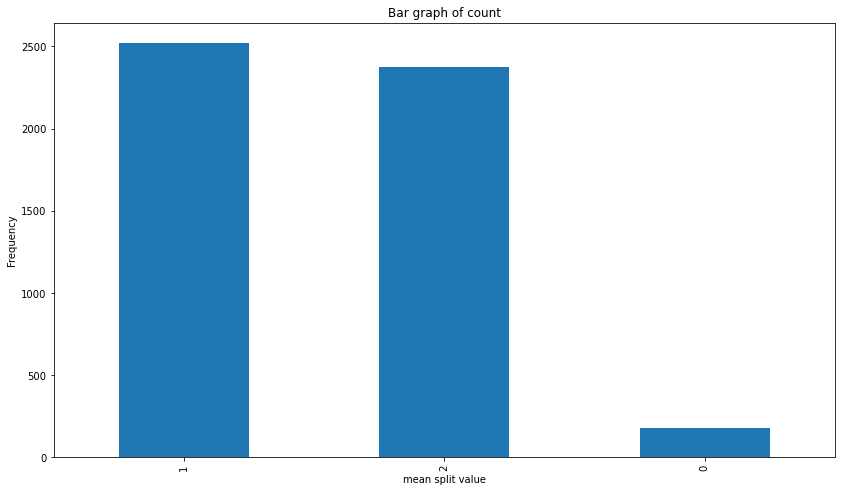

In [14]:
#ploting count of 'col1_mean_split value' using bar chart
ax = df['COL1_mean_split value'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Bar graph of count")
ax.set_xlabel("mean split value")
ax.set_ylabel("Frequency")

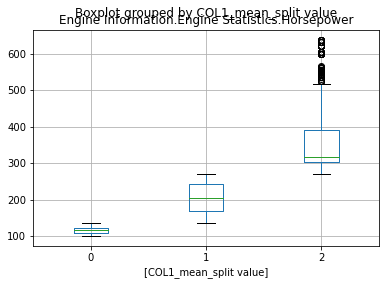

In [15]:
#Creating Box plot

#ploting count of 'col1_mean_split value' using box chart

boxplot = df.boxplot(column=['Engine Information.Engine Statistics.Horsepower'], by=['COL1_mean_split value'])

In [16]:
#Engine Information.Engine Statistics.Torque is the col3
#Calculating correlation between Torque and Horsepower
df[['Engine Information.Engine Statistics.Horsepower','Engine Information.Engine Statistics.Torque']].corr()

,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
Engine Information.Engine Statistics.Horsepower,1.000000,0.938304
Engine Information.Engine Statistics.Torque,0.938304,1.000000


There is very good correlation between Horsepower and Torque

<AxesSubplot:xlabel='Engine Information.Engine Statistics.Horsepower', ylabel='Engine Information.Engine Statistics.Torque'>

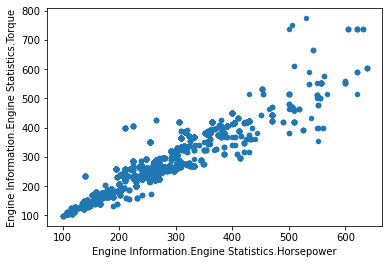

In [17]:
#Scatter plot of Horsepower vs Torque col1 vs col3
df.plot(kind='scatter',
        x='Engine Information.Engine Statistics.Horsepower',
        y='Engine Information.Engine Statistics.Torque')

Above scatter plot indicates strong correlation between Horse power and torque

Text(0, 0.5, 'Torque')

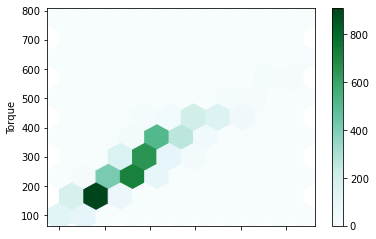

In [35]:
#Make a hexagonal binning plot of COL1 vs COL3
ax = df.plot.hexbin('Engine Information.Engine Statistics.Horsepower', 'Engine Information.Engine Statistics.Torque', gridsize=10)
ax.set_xlabel("Horse power")
ax.set_ylabel("Torque")

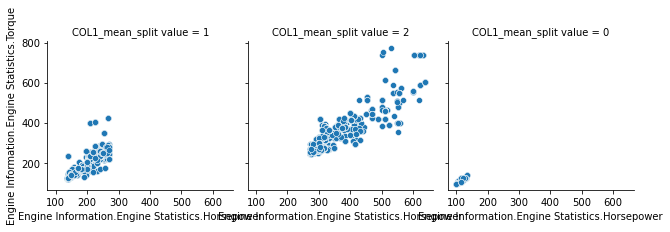

In [47]:
#BONUS POINT (optional):
#Make a facet grid using the seaborn library, 
#where you plot a hexagonal binning plot of COL1 and COL3 grouped into different facets based on the three values of COL1_mean_split

import seaborn as sns
import matplotlib.pyplot as plt


g = sns.FacetGrid(df, col="COL1_mean_split value")

g.map(sns.scatterplot, "Engine Information.Engine Statistics.Horsepower", "Engine Information.Engine Statistics.Torque")


In [ ]:
g = sns.FacetGrid(df, col="COL1_mean_split value")
x = df["Engine Information.Engine Statistics.Horsepower"]
y = df["Engine Information.Engine Statistics.Torque"]

sns.jointplot (x=x,y=y, kind="hex", color="#4CB391")

Hi Professor i tried my best to do the last optional plot, but i am able to plot only scatter but not Hexagonal Bin